---
title: "K-Means Clustering From Scratch"
description: "Performing K-Means Clustering From Scratch"
author: "Eric Peña"
date: 2021-07-01T00:00:00-00:00
type: non-technical_note
draft: false
---

# Introduction

Imagine we have a scattering of points whose labels or group assignments are completely unknown to us and moreover, we haven't a clue as to the number of groups. Unsupervised clustering helps us in such a situation and allows us to assign a cluster to each point. These clusters are defined by their centroids (centers). The K-Means algorithm will iteratively update these centroids to find the best location for them. It turns out that this clustering problem that K-Means helps solve is a computationally difficult problem (NP-Hard) but nevertheless we will go through the steps in detail here.

It may help understand this algorithm if we were to create the K-Means algorithm completely from scratch to get a deeper understanding of what is happening. This article includes:
1. Simulate data
2. Create functions used by K-Means
3. Perform K-Means with specified number of clusters
4. Define a score value, perform K-Means with different number of clusters, and choosing the best value for this hyperparameter
5. Performing K-Means with the Scikit-Learn library
6. Compare performance between our implementation and the Scikit-Learn implementation

# 1. Simulate Data
* Let's begin with simply simulating some points that we will then use to cluster

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

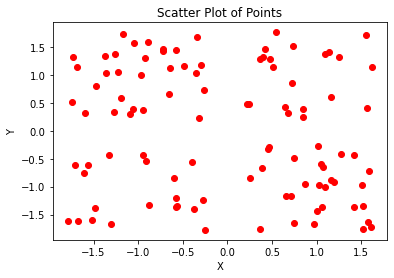

In [4]:
n = 100
points = [[random.choice([-1, 1]) + random.uniform(-0.8, 0.8) for _ in range(2)] for _ in range(n)]

[p.append(0) for p in points]
npoints = np.array(points)

plt.scatter(npoints[:,0], npoints[:,1], marker='o', c='r')
plt.title('Scatter Plot of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 2. Define Functions For K-Means
### Initialize Clusters
* Have k-means algorithm 'find' the clusters
* Begin by randomly choosing initial cluster values
* As we know with k-means, k should be chosen in the beginning. Say we didn't know there were four clusters in reality so we start with $k = 3$
* To choose initial clusters, let's take a sample of our data, calculate the means of our $X$ and $Y$ values and assign this to a cluster
* Let's say we take a small number of samples just to get rough starting clustering

In [5]:
def initialize_clusters(points, k):

    clusters = [0 for _ in range(k)]

    for i in range(len(clusters)):
        idx = np.random.randint(points.shape[0], size=5)
        sample = points[idx, :]
        clusters[i] = np.mean(sample, axis=0)
        clusters[i][-1] = i

    return np.array(clusters)

In [6]:
k = 3
clusters = initialize_clusters(npoints, k)

### Assign Points to a Cluster
* Let's go ahead and assign each point to a cluster depending on which one it is closest to
* We will need a distance method to define 'closeness'
* We will also need a method that allows us to compare each point to all clusters and choose the closes

In [7]:
def distance(a, b):
    return np.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)

In [8]:
def assign_labels(points, clusters):

    lpoints = np.empty((0, 3))

    for p in points:

        cluster_dist = []
        for c in clusters:
            cluster_dist.append(distance(p, c))

        p[2] = np.argmin(cluster_dist)
        lpoints = np.vstack((lpoints, p))
    
    return lpoints

In [9]:
lpoints = assign_labels(npoints, clusters)

In [10]:
x = lpoints[:, 0]
y = lpoints[:, 1]
l = lpoints[:, 2]

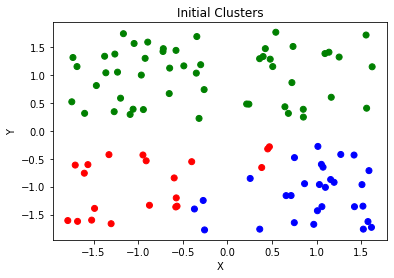

In [11]:
colors=['r','b','g']
plt.scatter(x, y, c = [colors[int(i)] for i in l])
plt.title('Initial Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Update Clusters
* Now that we have initial clusters, we can recalculate the clusters

In [12]:
def calculate_clusters(points):
    
    cluster_label = list(set(points[:,2]))
    clusters = []
    
    for c in cluster_label:
        mask = points[:, 2] == c
        clusters.append(np.mean(points[mask, :], axis=0))
        
    return np.array(clusters)

In [13]:
calculate_clusters(npoints)

array([[-0.90555932, -0.95877451,  0.        ],
       [ 0.94987571, -1.12258394,  1.        ],
       [-0.24173413,  1.00161447,  2.        ]])

* These are the functions needed to perform K-Means. All we have left to do is iteratively apply these functions to obtain optimal values for our clusters.

# 3. Perform K-Means with $k = 3$

* Generate new data and assign all points to the same group

In [14]:
n = 100
points = [[random.choice([-1, 1]) + random.uniform(-0.8, 0.8) for _ in range(2)] for _ in range(n)]

[p.append(0) for p in points]
npoints = np.array(points)

In [15]:
k = 3
iterations = 30

clusters = initialize_clusters(npoints, k)

for _ in range(iterations):
    # Assign points to clusters
    npoints = assign_labels(npoints, clusters)
    # Update cluster
    clusters = calculate_clusters(npoints)

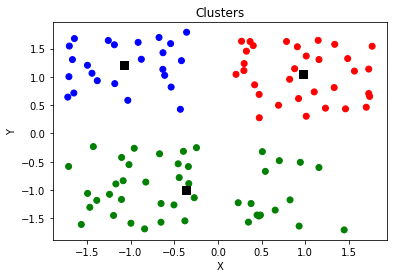

In [16]:
x = npoints[:, 0]
y = npoints[:, 1]
l = npoints[:, 2]

colors=['r','b','g', 'k', 'y']
plt.scatter(x, y, c = [colors[int(i)] for i in l])
plt.scatter(clusters[:,0],clusters[:,1],s=70,marker='s',c='k')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 4. Finding Best Value For $k$
* We can calculate the sum of squared distances between all points and their respective clusters

In [17]:
def calculate_score(points, clusters):
    
    dist_list = []
    for p in points:
        dist_list.append(distance(p, clusters[int(p[2])])**2)

    return sum(dist_list)

In [18]:
calculate_score(npoints, clusters)

63.98898775077078

### Iterate through and find best $k$ value by plotting Elbow

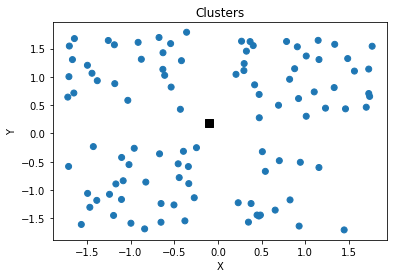

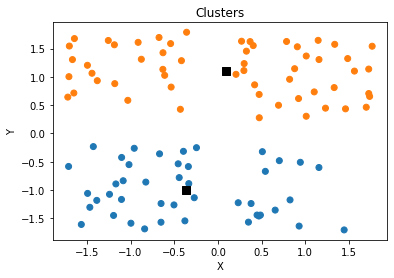

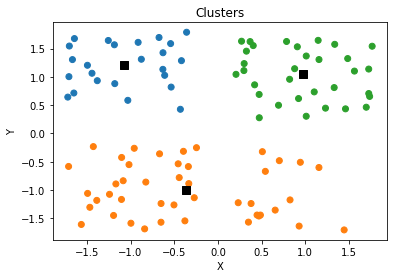

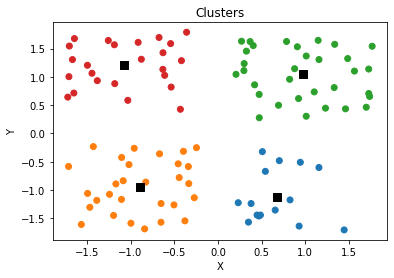

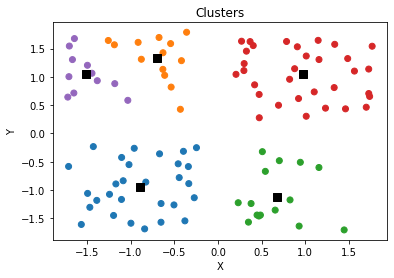

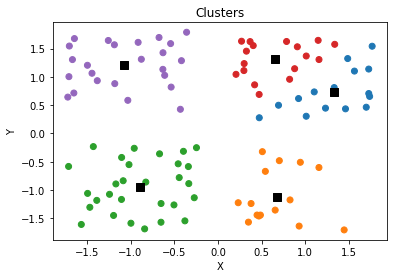

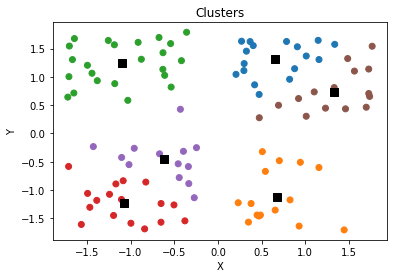

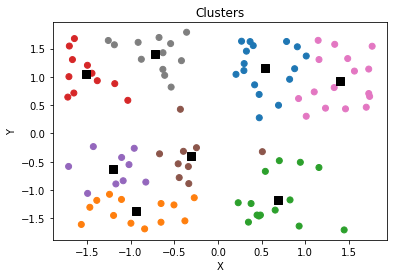

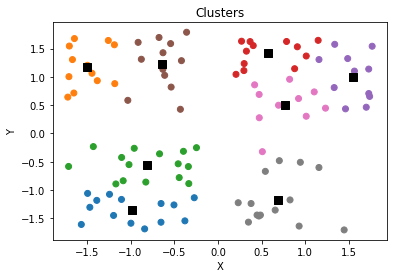

In [19]:
iterations = 50
scores = []
colors=['C' + str(i) for i in range(10)]

for k in range(1, 10):
    
    clusters = initialize_clusters(npoints, k)

    for _ in range(iterations):
        # Assign points to clusters
        npoints = assign_labels(npoints, clusters)
        # Update cluster
        clusters = calculate_clusters(npoints)
    
    scores.append([k, calculate_score(npoints, clusters)])
    
    x = npoints[:, 0]
    y = npoints[:, 1]
    l = npoints[:, 2]
    plt.scatter(x, y, c = [colors[int(i)] for i in l])
    plt.scatter(clusters[:,0],clusters[:,1],s=70,marker='s',c='k')
    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    

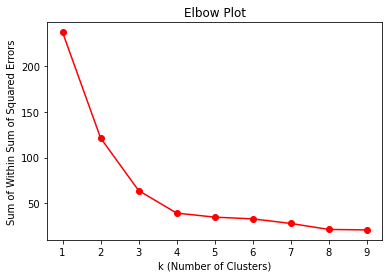

In [32]:
plt.plot([s[0] for s in scores], [s[1] for s in scores], 'ro-')
plt.title('Elbow Plot')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Sum of Within Sum of Squared Errors')
plt.show()

### Found Optimal Hyperparameter, $k$
* We find that 4 is the optimal number of clusters which was the number of clusters used to simulate the original data (with noise).

# 5. Using ScikitLearn Library
* Although we show how KMeans may be implemented ourselves with a few simple ideas, we can take advantage of libraries as well such as ScikitLearn. In fact, it only takes one line!

In [21]:
from sklearn.cluster import KMeans

In [22]:
y_pred = KMeans(n_clusters=4, random_state=0).fit(npoints[:, :2])

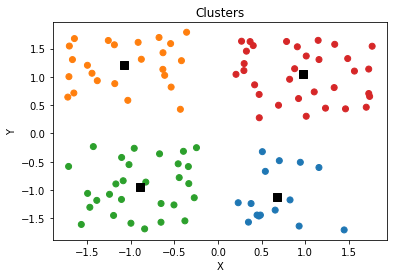

In [23]:
x = npoints[:, 0]
y = npoints[:, 1]
l = y_pred.labels_
plt.scatter(x, y, c = [colors[int(i)] for i in l])
plt.scatter(y_pred.cluster_centers_[:,0], y_pred.cluster_centers_[:,1],s=70,marker='s',c='k')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
y_pred.inertia_

39.46338949369036

# 6. Comparing Performance
* When compared to the scores we obtained from scrach (when $k = 4$), the scores are VERY similar! Just compare the "inertia" above with the score for $k = 4$ below.

In [25]:
scores

[[1, 236.5967940882629],
 [2, 121.32804203454275],
 [3, 63.98898775077078],
 [4, 39.46338949369035],
 [5, 35.048952764699855],
 [6, 33.172015160724094],
 [7, 28.18150296713385],
 [8, 21.647161881862452],
 [9, 21.134201520090667]]

# Conclusion
## Pros

* Relatively simple to implement.
* Scales to large data sets.
* Guarantees convergence.
* Can warm-start the positions of centroids.
* Easily adapts to new examples.
* Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

## Cons

* Must choose $k$ manually
* Quite dependent on initial centroids
* Clustering data of different sizes and densities
* Clusters could be 'dragged' by outliers (they may even get their own cluster)
* Scales poorly with high number of dimensions (consider projecting data points into lower dimensional space using PCA)

### We've completed all of our tasks and hopefully you have a better idea of how the K-Means algorithm works and how to implement it by hand if you needed to.

## References

* [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* [https://en.wikipedia.org/wiki/K-means_clustering](https://en.wikipedia.org/wiki/K-means_clustering)
* [https://en.wikipedia.org/wiki/Spectral_clustering#Relationship_with_k-means](https://en.wikipedia.org/wiki/Spectral_clustering#Relationship_with_k-means)